In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [10]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [11]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:

# Handle missing values
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna("Unknown")
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({
    'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'
})

In [13]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
label_encoder = LabelEncoder()

In [16]:
# Fit the label encoder on the Item_Type column
label_encoder.fit(train_data['Item_Type'])

# Retrieve the classes and create a mapping dictionary
item_type_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
print("Item_Type Encoding Mapping:", item_type_mapping)


Item_Type Encoding Mapping: {'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}


In [17]:
train_data['Item_Type'] = label_encoder.fit_transform(train_data['Item_Type'])
train_data['Outlet_Identifier'] = label_encoder.fit_transform(train_data['Outlet_Identifier'])
train_data['Outlet_Location_Type'] = label_encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type'] = label_encoder.fit_transform(train_data['Outlet_Type'])
train_data['Item_Fat_Content'] = label_encoder.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size'] = label_encoder.fit_transform(train_data['Outlet_Size'])


In [18]:
# Encoding categorical features in training data
test_data['Item_Type'] = label_encoder.fit_transform(test_data['Item_Type'])
test_data['Outlet_Identifier'] = label_encoder.fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Location_Type'] = label_encoder.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type'] = label_encoder.fit_transform(test_data['Outlet_Type'])
test_data['Item_Fat_Content'] = label_encoder.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size'] = label_encoder.fit_transform(test_data['Outlet_Size'])

In [19]:
X_train = train_data[['Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content', 'Outlet_Size']]
y_train = train_data['Item_Outlet_Sales']

In [20]:
X_train

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Fat_Content,Outlet_Size
0,4,249.8092,9,0,1,0,1
1,14,48.2692,3,2,2,1,1
2,10,141.6180,9,0,1,0,1
3,6,182.0950,0,2,0,1,3
4,9,53.8614,1,2,1,0,0
...,...,...,...,...,...,...,...
8518,13,214.5218,1,2,1,0,0
8519,0,108.1570,7,1,1,1,3
8520,8,85.1224,6,1,1,0,2
8521,13,103.1332,3,2,2,1,1


In [21]:
total_sum = sum(y_train)  # Sum of all sales
n = len(y_train)          # Number of observations
manual_mean = total_sum / n  # Mean calculation
print(f"Manually calculated mean: {manual_mean}")

Manually calculated mean: 2181.288913575032


In [22]:
# Subtract the mean from the target variable to calculate residuals
residuals = y_train - manual_mean

In [23]:
# Initialize the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=10)

In [24]:
model.fit(X_train, residuals)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=2000)

In [25]:
residual_predictions = model.predict(X_train)

In [26]:
# Evaluate the model using RMSE on training data (optional, you may skip this if you have no labels for the test set)
y_train_pred = manual_mean + residual_predictions
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'RMSE on training data: {rmse}')


RMSE on training data: 628.5270299648176


C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


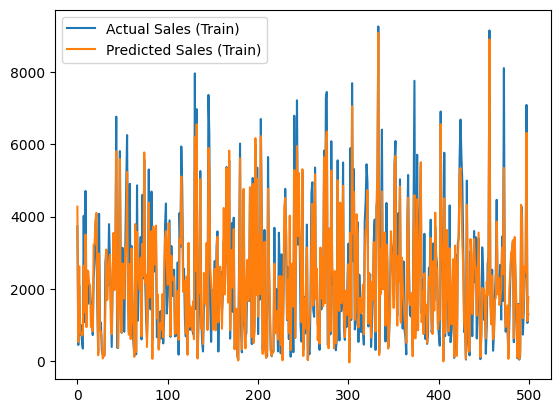

In [27]:
# Visualization of predictions (if you have actual test labels, use them for comparison)
plt.plot(y_train.values[:500], label='Actual Sales (Train)')
plt.plot(y_train_pred[:500], label='Predicted Sales (Train)')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_pred)
print(f'Mean Absolute Error (MAE) on training data: {mae}')

# Calculate R-squared (R2)
r_squared = r2_score(y_train, y_train_pred)
print(f'R-squared on training data: {r_squared}')

# If you have actual labels for the test set, you can evaluate the test predictions as well
if 'Item_Outlet_Sales' in test_data.columns:  # Check if the test set contains actual labels
    y_test_actual = test_df['Item_Outlet_Sales']
    rmse_test = mean_squared_error(y_test_actual, y_pred, squared=False)
    mae_test = mean_absolute_error(y_test_actual, y_pred)
    r_squared_test = r2_score(y_test_actual, y_pred)

    print(f'RMSE on test data: {rmse_test}')
    print(f'Mean Absolute Error (MAE) on test data: {mae_test}')
    print(f'R-squared on test data: {r_squared_test}')


Mean Absolute Error (MAE) on training data: 451.8112219786802
R-squared on training data: 0.864329168200789


In [29]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for training data
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f'MAPE on training data: {mape_train:.2f}%')

# If you have actual labels for the test set, calculate MAPE for test data
if 'Item_Outlet_Sales' in test_data.columns:  # Check if the test set contains actual labels
    y_test_actual = test_df['Item_Outlet_Sales']
    mape_test = mean_absolute_percentage_error(y_test_actual, y_pred)
    print(f'MAPE on test data: {mape_test:.2f}%')


MAPE on training data: 36.52%


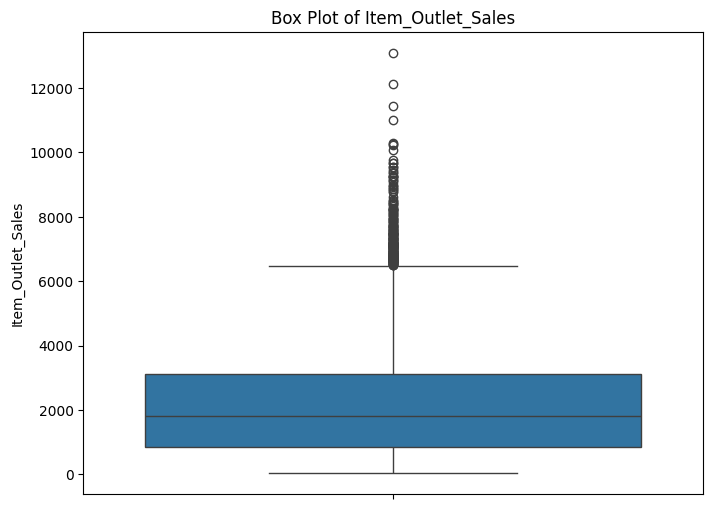

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Item_Outlet_Sales'
plt.figure(figsize=(8, 6))
sns.boxplot(train_data['Item_Outlet_Sales'])
plt.title('Box Plot of Item_Outlet_Sales')
plt.show()



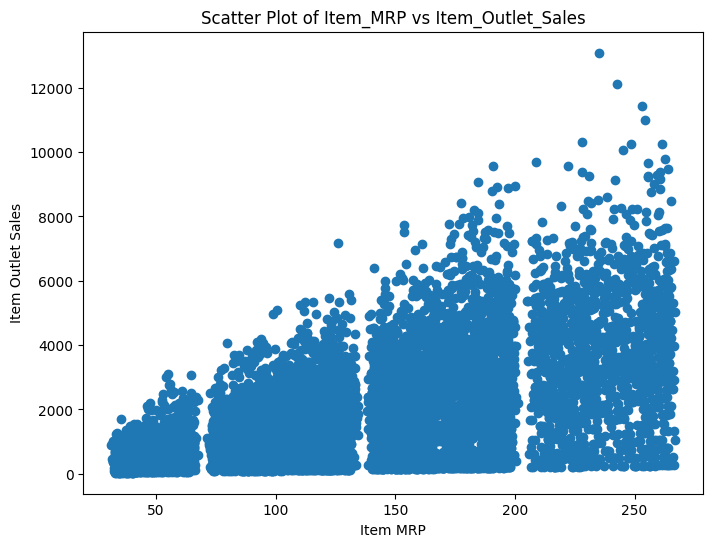

In [31]:
# Scatter plot of features vs target to identify unusual points
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Item_MRP'], train_data['Item_Outlet_Sales'])
plt.title('Scatter Plot of Item_MRP vs Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()


In [32]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Item_Outlet_Sales
Q1 = train_data['Item_Outlet_Sales'].quantile(0.25)
Q3 = train_data['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = train_data[(train_data['Item_Outlet_Sales'] < lower_bound) | (train_data['Item_Outlet_Sales'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 186


In [33]:
# Remove outliers from the dataset
train_data_cleaned = train_data[(train_data['Item_Outlet_Sales'] >= lower_bound) & (train_data['Item_Outlet_Sales'] <= upper_bound)]
print(f"New dataset size after removing outliers: {len(train_data_cleaned)}")

New dataset size after removing outliers: 8337


<h3> Save the model </h3>

In [34]:
import joblib

In [35]:
model_filename = "bigmart_model.joblib"
joblib.dump(model,model_filename)
print(f"Model saved to {model_filename}")

Model saved to bigmart_model.joblib


In [36]:
# Load the model from the file and make predictions
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

Model loaded successfully.


In [66]:
sample_input = pd.DataFrame([[1256, 100, 1, 1, 2,0, 0]], 
                            columns=['Item_Type', 'Item_MRP', 'Outlet_Identifier', 
                                     'Outlet_Location_Type', 'Outlet_Type', 
                                     'Item_Fat_Content', 'Outlet_Size'])

In [67]:
sample_prediction = manual_mean + loaded_model.predict(sample_input)
print(f"Predicted sales for the sample input: {sample_prediction[0]}")

Predicted sales for the sample input: 1253.1009745224128


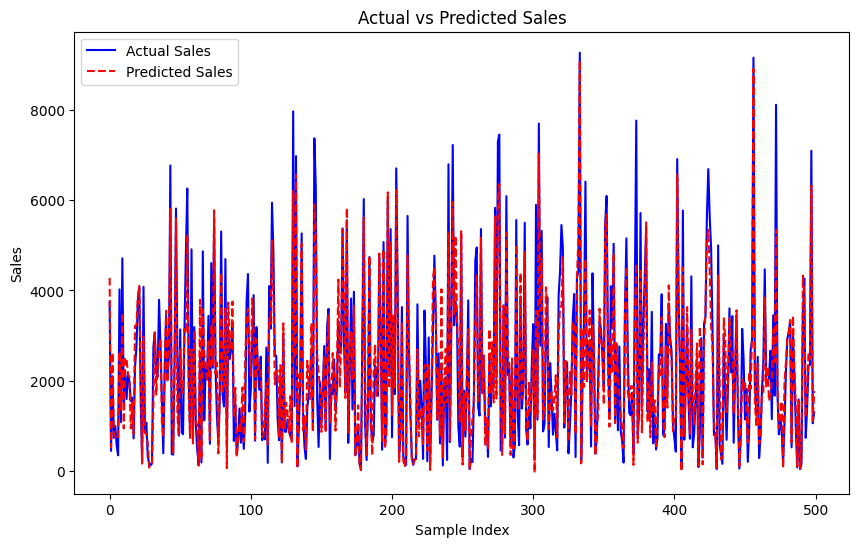

In [57]:
import matplotlib.pyplot as plt

# Predict sales on a sample range (e.g., first 500 samples from the training set)
X_sample = X_train[:500]  # Adjust the range as needed
y_sample_actual = y_train[:500]
y_sample_predicted = manual_mean + model.predict(X_sample)

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_sample_actual.values, label='Actual Sales', color='blue')
plt.plot(y_sample_predicted, label='Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()
